# Homework 2

Noah Kim 

Section AC

In [85]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

1) A little introductory brain teaser. _Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?_


When rolling a dice, there are 6 possible scenarios in which the dice lands. $1, 2, 3, 4, 5,$ and $6$ each having $\frac{1}{6}$ probability of being rolled. There is only one possible combination to rolling snake eyes that being           $\frac{1}{6}$ *  $\frac{1}{6}$ =  $\frac{1}{36}$ to roll snake eyes. where there is 6 combinations to roll a sum of seven being  $\frac{6}{36}$. The ratio of the probabilities would be $6:1$ in favor of rolling sevens.

2) _Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program)._

Below is all the possibilities of rolling a number from 2 to 12 using two six-sided die. 

In [86]:
values = np.arange(1, 7)
table = np.zeros((6, 6))
for i in range(6):
    for j in range(6):
        table[i][j] = values[i] + values[j]
pd.DataFrame(table, columns=values, index=values)

,1,2,3,4,5,6
1,2.0,3.0,4.0,5.0,6.0,7.0
2,3.0,4.0,5.0,6.0,7.0,8.0
3,4.0,5.0,6.0,7.0,8.0,9.0
4,5.0,6.0,7.0,8.0,9.0,10.0
5,6.0,7.0,8.0,9.0,10.0,11.0
6,7.0,8.0,9.0,10.0,11.0,12.0


Let $f(x)$ and $g(x)$ be the probability density functions of the two dice. The convolution of the two is the probability for each of the sum of the two dice. The discrete convolution equation for the two dice is as followed:

$P_{A+B}(x) = \sum_{z} f(z)g(x-z)$

By analytically doing the above equation, the probability that the sum is a given value x is the number of times it appears on the table above divided by 36.
Counting all the values and distributing them based on probability we get the table:  

| Sum | 1 | 2    | 3    | 4    | 5    | 6    | 7    | 8    | 9    | 10   | 11   | 12   |
|-----|---|------|------|------|------|------|------|------|------|------|------|------|
| Prob| 0 | 1/36 | 2/36 | 3/36 | 4/36 | 5/36 | 6/36 | 5/36 | 4/36 | 3/36 | 2/36 | 1/36 |


In order to automate this process, I used the convolve function which does the mathematical operation above for each possible combination and sums above.

Convolved =  [0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]


<BarContainer object of 11 artists>

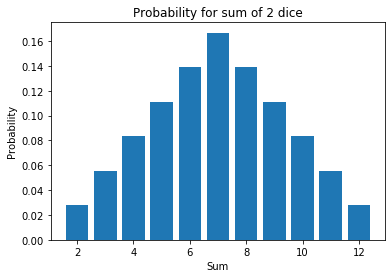

In [143]:
probabilities = np.array([1/6] * 6)
sum_probabilities = np.convolve(probabilities, probabilities, mode="full")
print("Convolved = ", sum_probabilities)
plt.title("Probability for sum of 2 dice")
plt.xlabel("Sum")
plt.ylabel("Probability")
plt.bar(np.arange(2, 13), sum_probabilities)

3) _Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense._

$\mu = \sum\limits_{i=1}^{n} x_i p_i$ and $\sigma^2 = \sum\limits_{i=1}^{n} (x_i - \mu)^2 p_i$.

In [88]:
mean = sum(np.arange(2,13) * sum_probabilities)
variance = sum((np.arange(2,13) - mean)**2 * sum_probabilities)
print("mean = ", mean)
print("variance = ", variance)

mean =  7.0
variance =  5.833333333333334


The mean and variance of two die is 7.0 and 5.83 respectively.

4) _Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth._

For the sum of 10 dice, and I convolve them using the function, I set one normally and the other one on a logarithmic scale.

<BarContainer object of 51 artists>

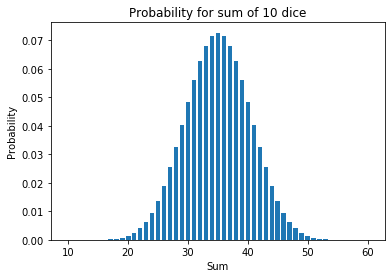

In [89]:
n = 10
die = np.array([1/6] * 6)
sum_prob = np.convolve(die, die, mode="full")
for i in range (n-2):
    sum_prob = np.convolve(sum_prob,die)
plt.title(f"Probability for sum of {n} dice")
plt.xlabel("Sum")
plt.ylabel("Probability")
plt.bar(np.arange(n,6*n+1 ), sum_prob)

<BarContainer object of 51 artists>

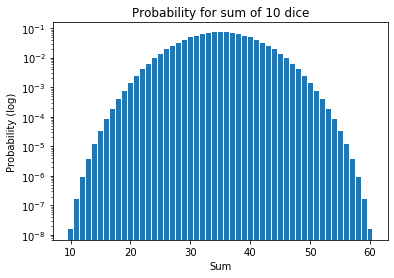

In [90]:
plt.yscale('log')
plt.title(f"Probability for sum of {n} dice")
plt.xlabel("Sum")
plt.ylabel("Probability (log)")
plt.bar(np.arange(n,6*n+1 ), sum_prob)

In order to graph the average of 10 dice, first we have to find the probability of the average of 10 independent dice rolls and to average a distribution 10 times we convolve it 10 times.

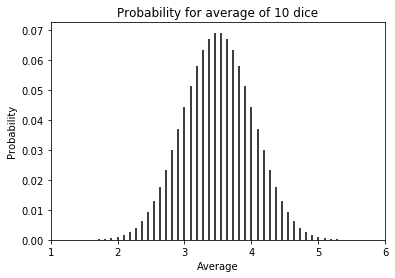

In [91]:
def avg_prob(num_dice):
    prob = np.array([1/6] * 6)
    avg_prob = prob
    for i in range(num_dice):
        avg_prob = np.convolve(prob, avg_prob)

    plt.title(f"Probability for average of {num_dice} dice")
    plt.xlabel("Average ")
    plt.ylabel("Probability")
    # The average can range from 1 to 6 avg_prob length will change depending on how many dice you add
    plt.vlines(np.linspace(1,6,len(avg_prob)), 0, avg_prob);
    plt.xlim(1, 6)
    plt.ylim(0, None) 
    
avg_prob(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]


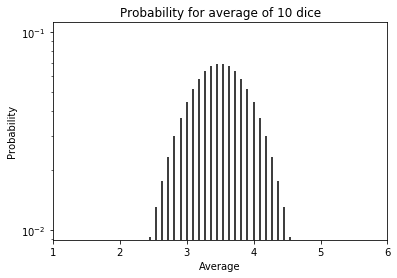

In [95]:
plt.yscale('log')
avg_prob(10)

Using both Sum and Average, we see that the shape closely resembles a Gaussian distribution on normal scale and the logarithmic scale. I found an interesting trend where adding more dice makes the probability of average dice graph look closer to the Gaussian distribution the more dice I add. This is because of the concept of Central Limit Theorem, the approximations improve with higher number of dice rolls because "when independent random variables are added, their properly normalized sum tends toward a normal distribution (Gaussian) even if the values themselves are not normally distributed. 

5) _Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Guassian change? This is a hugely important result. Explore what this means for integrating a signal over time._

From the examples shown in question 4, the sum and average of an initially Gaussian distribution is also Gaussian and the more dice we add the closer they become to being a truly Gaussian distribution. I graphed the sum of 1, 2, and 3 Gaussian distributions and the convolved of 1 Gaussian distribution 0, 1, and 2 times. 

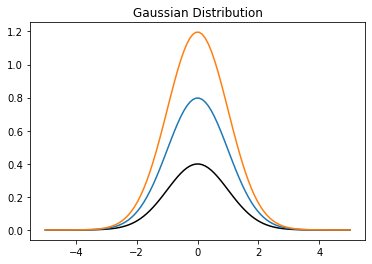

In [138]:
x = np.linspace(-5,5,100)
gaussian = stats.norm.pdf(x,loc=0,scale=1)
results = gaussian
plt.plot(x,gaussian, 'k-')
plt.title('Sum of 3 Gaussian Distribution')
def plot_gaus(n):
    plt.plot(x,(gaussian * n))
plot_gaus(2)
plot_gaus(3)


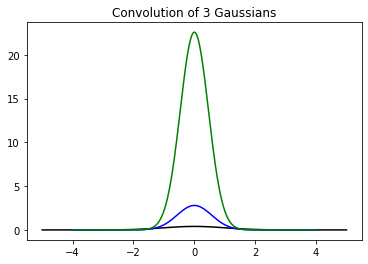

In [142]:
plt.title("Convolution of 3 Gaussians")
plt.plot(x, dist.pdf(x), 'k-')
avg = np.convolve(gaussian, gaussian)
avg2 = np.convolve(avg, gaussian)
plt.plot(np.linspace(-4, 4, len(avg)), avg, 'b-')
plt.plot(np.linspace(-4, 4, len(avg2)), avg2, 'g-')

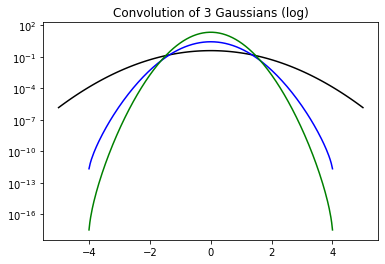

In [144]:
plt.yscale('log')
plt.title("Convolution of 3 Gaussians (log)")
plt.plot(x, dist.pdf(x), 'k-')
avg = np.convolve(gaussian, gaussian)
avg2 = np.convolve(avg, gaussian)
plt.plot(np.linspace(-4, 4, len(avg)), avg, 'b-')
plt.plot(np.linspace(-4, 4, len(avg2)), avg2, 'g-')

From question 4, we can assume the sum of 1, 2, and 3 Gaussian distributions on the log scale will mimic a downwards parabola like it did for the average of 10 dice. 

I took the log of the convolved gaussians and found they are also downards parabolas indicating that convolution of a Gaussian PDF is also a Gaussian PDF. This can be said the same for the sum. in the case for the sum normalizing the curves would not change the standard deviation at all while if we were to normalize the convolution curves we would get a smaller standard deviation. This is important because it tells us we can reduce the standard deviation of a measurement by just averaging successive independent measurements, meaning the more we take measurements the lower and lower the variance will become. For the case of a signal over time, if you integrate the signal over a greater period of time, the more precise the signal will become and the less background signals may contribute to error. More time = less background and precise measurements. 